In [5]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
df = pd.read_json('training_json_file.json', orient='records')

In [7]:
df.head()

,cleaned_html,label
0,,1700
1,1 U.S. 20 1 Dall. 20 1 L.Ed. 19 ANONYMOUS. No....,1700
2,1 U.S. 18 1 Dall. 18 1 L.Ed. 18 The Lessee of ...,1700
3,1 U.S. 194 1 Dall. 194 1 L.Ed. 96 Gerardv.La C...,1700
4,1 U.S. 210 1 Dall. 210 1 L.Ed. 104 Pollardv.Sh...,1700


In [8]:
filter = df["cleaned_html"] != ""
filtered_df = df[filter]
filtered_df = filtered_df.dropna()

2000    26977
1900    23179
1800     9762
1700      137
Name: label, dtype: int64


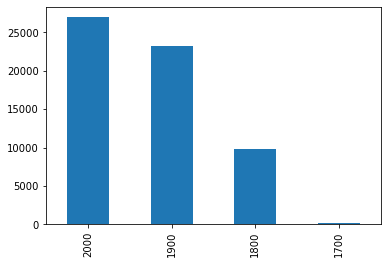

In [12]:
filtered_df['label'].value_counts().plot(kind='bar')
print(filtered_df['label'].value_counts())

In [10]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [11]:
X = []
sentences = list(filtered_df["cleaned_html"])
for sen in sentences:
    X.append(preprocess_text(sen))

y = filtered_df.label.values